In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.ensemble import HistGradientBoostingClassifier , RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_validate
from sklearn.datasets import make_classification


In [7]:
df_train = pd.read_csv('V1_df_train.csv') 
df_test = pd.read_csv('V1_df_test.csv')

In [8]:
df_train.shape

(63297, 17)

In [9]:
df_train = df_train.dropna()
df_test = df_test.dropna()

## Matriz de correlación de las variables

En este apartado observaremos las relacciones entre las variables mediante el coeficiente de correlación entre ellas y precio. Para ellos utilizaremos diversas herramientas gráficas que nos permiten evalular a simple vista dichas relaciones.
Veremos dos matrices que nos ilustran los coeficientes de correlación, una bajo el criterio de Spearman y la segunda bajo el de Pearson.
Es importantes destacar que hay variables que pueden estar igualmente relacionadas y que éstos métodos no detecten.

*Correlación de Spearman*

Los coeficientes de correlación de Spearman solo miden relaciones monótonas entre las variables, es decir la medida en que tienden a cambiar al mismo tiempo aunque la proporción o tasa de cambio no sea constante. Es por esto que en caso que haya una relación lineal, el coeficiente de Spearman siempre arrojará datos más elevados que el de Pearson en comparación.

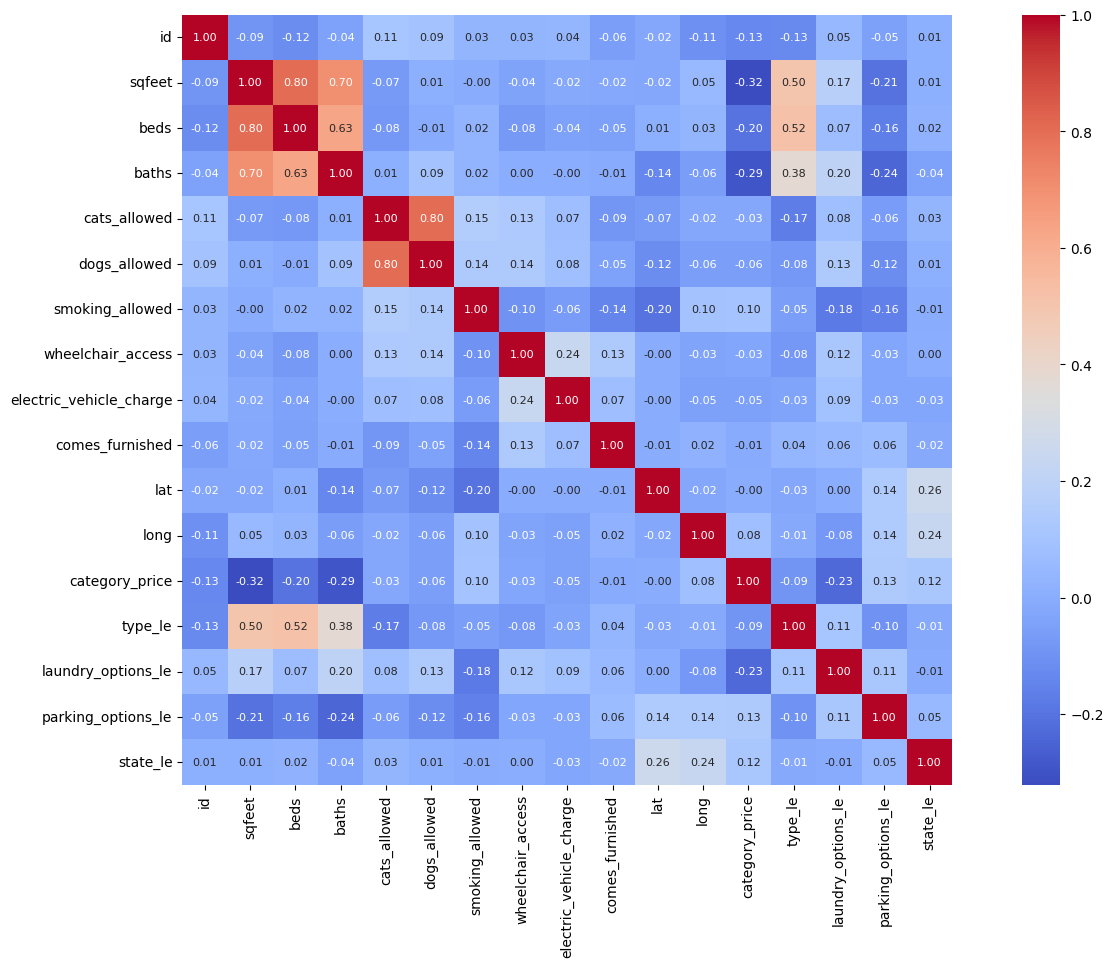

In [10]:
corr = df_train.corr(method='spearman')
plt.figure(figsize=(18,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
           xticklabels= df_train.columns, 
           yticklabels= df_train.columns,
           cmap= 'coolwarm')

plt.show()

Como es de esperarse, vemos que existe una fuerte relación positiva entre el tamaño de la propiedad, la cantidad de baños y la cantidad de habitaciones. Más leve, tambien vemos una correlación entre el tipo de propiedad con las tres variables mencionadas anteriormente. Esto es porque valores elevados de type_le se asignaron a condo, house o townhouse, las cuales son propiedadaes más grandes.

*Correlación de Pearson*

Un coeficiente de correlación de Pearson será más elevado en tanto más lineal y pari passu sea la relación entre los cambios en las variables.
En este caso vemos que hay variables que están altamente correlacionadas con la variable precio, y otras que casi no tienen relación.
Asimismo, también se aprecia que algunas variables tienen una altísima correlación entre si, lo cual implica un enorme riesgo de que nuestra estimación cuente con problemas de multicolinealidad.
En el próximo apartado abordaremos estos temas en detalle.

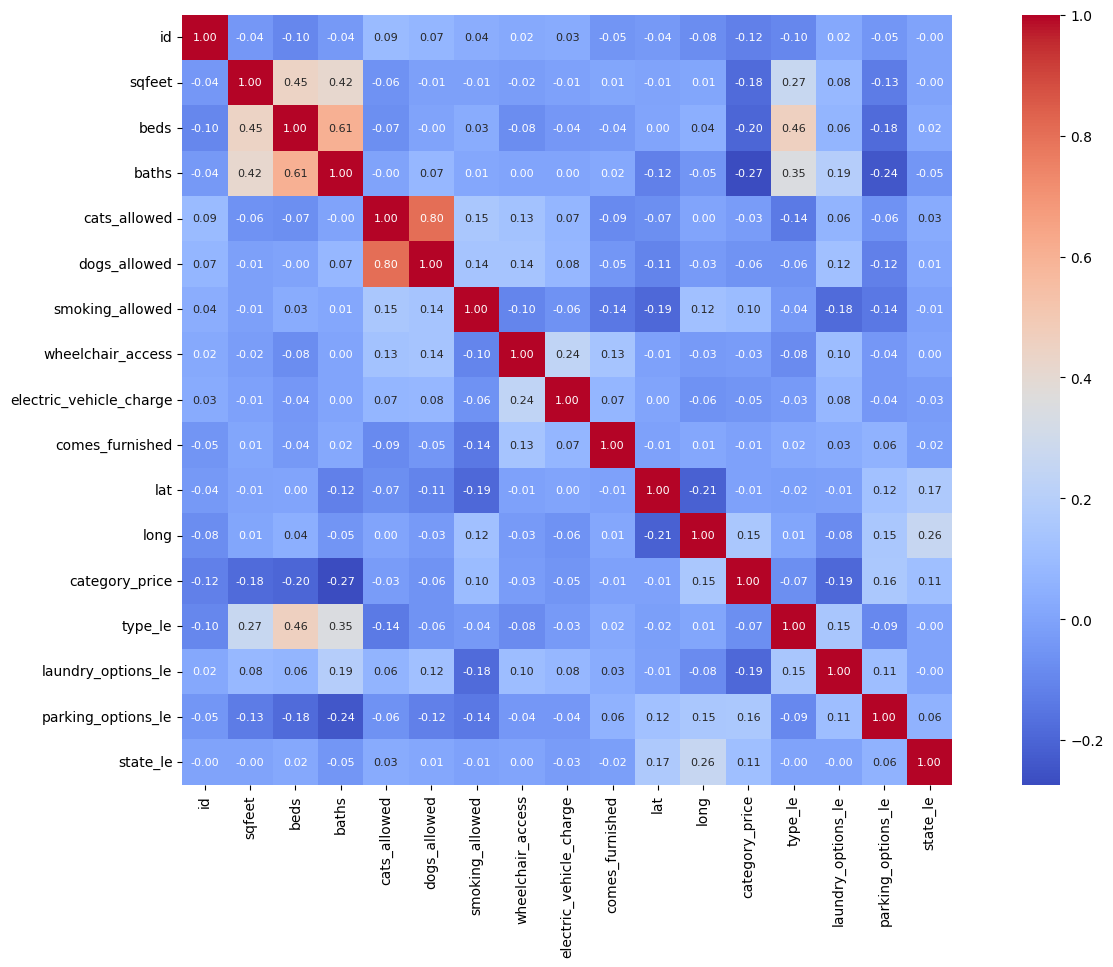

In [11]:
corr = df_train.corr(method='pearson')
plt.figure(figsize=(18,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
           xticklabels= df_train.columns, 
           yticklabels= df_train.columns,
           cmap= 'coolwarm')

plt.show()

Como era de esperarse, bajo la correlación de pearson los coeficientes son menores. Sin embargo la correlación entre las variables cats_allowed y dogs_allowed es muy elevada, lo que puede llevar a problemas de multicolinealidad. Voy a eliminar la variable dogs_allowed de ambos dataframes para la prueba.
También ya puedo desprenderme de la columa id, pues ya no tiene utilidad.

In [12]:
df_train.columns

Index(['id', 'sqfeet', 'beds', 'baths', 'cats_allowed', 'dogs_allowed',
       'smoking_allowed', 'wheelchair_access', 'electric_vehicle_charge',
       'comes_furnished', 'lat', 'long', 'category_price', 'type_le',
       'laundry_options_le', 'parking_options_le', 'state_le'],
      dtype='object')

In [10]:
# df_train.drop(['id','smoking_allowed','wheelchair_access', 'electric_vehicle_charge','comes_furnished','laundry_options_le', 'parking_options_le'], axis=1, inplace=True)
# df_test.drop(['id','smoking_allowed','wheelchair_access', 'electric_vehicle_charge','comes_furnished','laundry_options_le', 'parking_options_le'], axis=1, inplace=True)

Agrego al dataframde df_test la columna category_price

In [13]:
df_test['category_price'] = ''

In [14]:
df_test.shape

(38302, 17)

In [15]:
df_train.shape

(62461, 17)

In [16]:
df_train.columns

Index(['id', 'sqfeet', 'beds', 'baths', 'cats_allowed', 'dogs_allowed',
       'smoking_allowed', 'wheelchair_access', 'electric_vehicle_charge',
       'comes_furnished', 'lat', 'long', 'category_price', 'type_le',
       'laundry_options_le', 'parking_options_le', 'state_le'],
      dtype='object')

La dimensionalidad de ambas es igual, asique podemos comenzar con la puesta en marcha de los modelos.

                                              /**/**/**/**/**/**/**/**/**/**/**/**/**/**/**/**/**/**/**/**/**/**/**/**/**/**/**/**/**/**/**/**/**/**/**/**/**/**/**/**/**/**/**/**/**/**/**/**/**/**/**/**

Preparo la data para correr los modelos.

In [17]:
X = df_train.drop(columns=['category_price']) 
                                           
y = df_train['category_price'] 

In [18]:
X.shape , y.shape

((62461, 16), (62461,))

Separo la data en entrenamiento y testeo.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## *MODELOS*

#### *DECISION TREE CLASSIFIER*

In [20]:
clf_dt = DecisionTreeClassifier(max_depth = 30)
clf_dt.fit(X_train , y_train)
y_pred_dt = clf_dt.predict(X_test)

In [21]:
print(accuracy_score(y_test, y_pred_dt))
print(recall_score(y_test, y_pred_dt))

0.7932120177170606
0.7369452610947781


In [22]:
y_pred_dt

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

Ahora pruebo el DecisionTreeClassifier con GridSearchCV

In [23]:
parametros = {'criterion':['gini'],'max_depth': np.arange(40)}

dt_gs = DecisionTreeClassifier()

clf_dt_gs = GridSearchCV(dt_gs, param_grid=parametros, scoring='accuracy', cv=5)

clf_dt_gs.fit(X_train, y_train)

c:\Users\VAIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\VAIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\VAIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "c:\Users\VAIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py", line 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini'],
                         'max_depth': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])},
             scoring='accuracy')

In [24]:
y_pred_dt_gs = clf_dt_gs.predict(X_test)
print(accuracy_score(y_test, y_pred_dt_gs))
print(recall_score(y_test, y_pred_dt_gs))

0.8073002828325951
0.74212515749685


Ahora voy a realizar algunas eliminaciones de features para ver como se modifica la performance del modelo.

In [ ]:
df_train.drop(['id','smoking_allowed','wheelchair_access', 'electric_vehicle_charge','comes_furnished','laundry_options_le', 'parking_options_le'], axis=1, inplace=True)
df_test.drop(['id','smoking_allowed','wheelchair_access', 'electric_vehicle_charge','comes_furnished','laundry_options_le', 'parking_options_le'], axis=1, inplace=True)

In [35]:
X = df_train.drop(columns=['category_price']) 
                                           
y = df_train['category_price'] 

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
clf_dt = DecisionTreeClassifier(max_depth = 30)
clf_dt.fit(X_train , y_train)
y_pred_dt = clf_dt.predict(X_test)
print(accuracy_score(y_test, y_pred_dt))
print(recall_score(y_test, y_pred_dt))

0.7971610011206575
0.7331653366932661


Vemos que la diferencia no fue significativa, ya huno un trade off entre accuracy y recall_score.

In [45]:
pd.DataFrame(y_pred_dt).to_csv('maurogpiniV2.csv', index = False , header = 'pred')